In [1]:
import pandas as pd
import numpy as np

## Step1- Load the Data

In [13]:
df=pd.read_csv('dss_publish.csv')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974970 entries, 0 to 974969
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Invoice Date  974970 non-null  object 
 1   Item Code     974970 non-null  object 
 2   QTY           974970 non-null  int64  
 3   Total Cost    974970 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 29.8+ MB


## Step2- ABC Analysis

In [18]:
abc_df=df.groupby('Item Code')['Total Cost'].sum().reset_index()

In [20]:
abc_df

,Item Code,Total Cost
0,001343f3,5925.114817
1,00225dd5,3896.121140
2,002c3dfa,728.200000
3,00360ad5,30431.541229
4,004ae629,1644.720000
...,...,...
5331,ffd00e62,25705.895490
5332,ffec21ea,34221.296705
5333,fff0824e,384103.941000
5334,fff09a09,396.252481


In [24]:
abc_df=abc_df.sort_values('Total Cost',ascending=False)

In [28]:
abc_df.head(1)

,Item Code,Total Cost
2149,6672fbd4,5.836784e+06


In [30]:
abc_df['cum_pct']=abc_df['Total Cost'].cumsum()/abc_df['Total Cost'].sum()

In [34]:
abc_df.head()

,Item Code,Total Cost,cum_pct
2149,6672fbd4,5.836784e+06,0.021287
964,2d331125,3.709988e+06,0.034818
1758,53509f65,2.477283e+06,0.043853
4343,d158d5ce,2.436511e+06,0.052739
4871,ea97304e,2.133111e+06,0.060518


In [42]:
abc_df.columns

Index(['Item Code', 'Total Cost', 'cum_pct'], dtype='object')

In [44]:
# function for ABC classification

def classify_abc(x):
    if x<=0.7:
        return 'A'
    elif x<=0.9:
        return 'B'
    else:
        return 'C'

## applycing the logic on the dataframe

abc_df['ABC']=abc_df['cum_pct'].apply(classify_abc)

In [46]:
abc_df

,Item Code,Total Cost,cum_pct,ABC
2149,6672fbd4,5.836784e+06,0.021287,A
964,2d331125,3.709988e+06,0.034818,A
1758,53509f65,2.477283e+06,0.043853,A
4343,d158d5ce,2.436511e+06,0.052739,A
4871,ea97304e,2.133111e+06,0.060518,A
...,...,...,...,...
2590,7c256a0a,0.000000e+00,1.000000,C
107,050e31a1,0.000000e+00,1.000000,C
4145,c8401c38,0.000000e+00,1.000000,C
1074,32949e8a,0.000000e+00,1.000000,C


## Step3: Classifiying Regular moving, Moderately Moving and Slow Moving

As we have sale data from the last onr year, we will consider an item to be regular if sold more than 52*2=104 times in a year (considering 52 weeks are in a year). Moderate moving if sold more than 24 times in a year, slowing moving if sold less than 24 times in a year

In [506]:
def classify_regular_moderate_slow(x):
    if x>=104:
        return 'Regular Moving'
    elif x>=24:
        return 'Moderate Moving'
    else:
        return 'Slow Moving'

In [508]:
item_count_df=df.groupby('Item Code')['Item Code'].count().reset_index(name='Item Count')

In [510]:
item_count_df.head(2)

,Item Code,Item Count
0,001343f3,35
1,00225dd5,32


In [512]:
## applying the logic on data  frame

item_count_df['Moving Status']=item_count_df['Item Count'].apply(classify_regular_moderate_slow)

In [526]:
item_count_df['Moving Status'].value_counts()

Moving Status
Slow Moving        2630
Regular Moving     1474
Moderate Moving    1232
Name: count, dtype: int64

## Step 4: Loading Current stock data

In [729]:
current_stock_df=pd.read_excel('publish_current_stock_backup.xlsx')

In [731]:
current_stock_df.head(2)

,Item Code,QTY,CHK
0,891e62ac,6,0
1,cba5655b,27,0


In [733]:
df.columns

Index(['Invoice Date', 'Item Code', 'QTY', 'Total Cost', 'month',
       'severity_score', 'PO_followup_priority'],
      dtype='object')

In [735]:
df['Invoice Date']=pd.to_datetime(df['Invoice Date'])

In [737]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974970 entries, 0 to 974969
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Invoice Date          974970 non-null  datetime64[ns]
 1   Item Code             974970 non-null  object        
 2   QTY                   974970 non-null  int64         
 3   Total Cost            974970 non-null  float64       
 4   month                 974970 non-null  period[M]     
 5   severity_score        5336 non-null    float64       
 6   PO_followup_priority  5336 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(2), period[M](1)
memory usage: 52.1+ MB


In [739]:
df['month']=df['Invoice Date'].dt.to_period('M')

In [741]:
df.head()

,Invoice Date,Item Code,QTY,Total Cost,month,severity_score,PO_followup_priority
0,2024-12-31,155108e1,1,29.00,2024-12,9.0,Medium Priority
1,2024-12-31,7fdf96c6,1,13.23,2024-12,6.0,OK: Stock > ROL
2,2024-12-31,4c201ddc,3,318.78,2024-12,6.0,No PO!
3,2024-12-31,c23dc657,1,50.40,2024-12,6.0,No PO!
4,2024-12-31,dc08c95c,8,14.72,2024-12,6.0,OK: Stock > ROL


In [743]:
monthly_sale_df=df.groupby(['Item Code','month'])['QTY'].sum().reset_index()

mon

In [746]:
monthly_sale_df

,Item Code,month,QTY
0,001343f3,2024-01,155
1,001343f3,2024-02,120
2,001343f3,2024-03,211
3,001343f3,2024-04,10
4,001343f3,2024-05,20
...,...,...,...
37901,fff09a09,2024-07,20
37902,fff4227c,2024-01,1
37903,fff4227c,2024-03,1
37904,fff4227c,2024-04,2


In [758]:
daily_consumption=monthly_sale_df.groupby('Item Code')['QTY'].sum()/300

In [761]:
# Step 2: Merge with current stock data
doh_df = current_stock_df.merge(daily_consumption.reset_index(name='Daily Consumption'),on='Item Code',how='left')

In [763]:
doh_df['DOI']=doh_df['QTY']/doh_df['Daily Consumption']

In [765]:
doh_df[doh_df['Daily Consumption']>1]

,Item Code,QTY,CHK,Daily Consumption,DOI
12,54376784,49,0,1.076667,45.510836
16,87f009e0,2786,0,3.923333,710.110450
17,08f0b853,11,0,3.216667,3.419689
19,0ba5f513,0,Reduce,14.860000,0.000000
21,83b9e5fc,5,0,2.663333,1.877347
...,...,...,...,...,...
3788,843e4094,0,Reduce,1.140000,0.000000
3800,899e3a36,0,Reduce,7.100000,0.000000
3816,f22ee433,0,Reduce,2.436667,0.000000
3818,79695af1,0,Reduce,1.723333,0.000000


## Step 5: Load Pending PO Data

In [165]:
pending_po_df.to_excel('publish_ppo.xlsx')

In [167]:
pending_po_df=pd.read_excel('publish_ppo.xlsx')

In [169]:
pending_po_df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Item Code', 'PO_QTY2'], dtype='object')

In [173]:
pending_po_df.drop(['Unnamed: 0.1'],axis=1)

,Unnamed: 0,Item Code,PO_QTY2
0,0,001343f3,200
1,1,002c3dfa,24
2,2,00598eb7,3
3,3,005f7072,150
4,4,008b8876,12600
...,...,...,...
2199,2199,ff640cc2,30
2200,2200,ff8212a9,1205
2201,2201,ff90ae5b,3600
2202,2202,ffb4118b,100


In [177]:
pending_po_df.drop(['Unnamed: 0.1'],axis=1)

,Unnamed: 0,Item Code,PO_QTY2
0,0,001343f3,200
1,1,002c3dfa,24
2,2,00598eb7,3
3,3,005f7072,150
4,4,008b8876,12600
...,...,...,...
2199,2199,ff640cc2,30
2200,2200,ff8212a9,1205
2201,2201,ff90ae5b,3600
2202,2202,ffb4118b,100


In [181]:
pending_po_df=pending_po_df[['Item Code','PO_QTY2']].reset_index()

In [185]:
pending_po_df.drop(['index'],axis=1)

,Item Code,PO_QTY2
0,001343f3,200
1,002c3dfa,24
2,00598eb7,3
3,005f7072,150
4,008b8876,12600
...,...,...
2199,ff640cc2,30
2200,ff8212a9,1205
2201,ff90ae5b,3600
2202,ffb4118b,100


## Step 6: Merging the Data Base

In [769]:
abc_df.columns

Index(['Item Code', 'Total Cost', 'cum_pct', 'ABC'], dtype='object')

In [771]:
item_count_df.columns

Index(['Item Code', 'Item Count', 'Moving Status'], dtype='object')

In [773]:
doh_df.columns

Index(['Item Code', 'QTY', 'CHK', 'Daily Consumption', 'DOI'], dtype='object')

In [775]:
pending_po_df.columns

Index(['index', 'Item Code', 'PO_QTY2'], dtype='object')

In [777]:
## Merging

final_df=abc_df.merge(item_count_df[['Item Code','Item Count','Moving Status']], on='Item Code')

In [779]:
final_df

,Item Code,Total Cost,cum_pct,ABC,Item Count,Moving Status
0,6672fbd4,5.836784e+06,0.021287,A,3455,Regular Moving
1,2d331125,3.709988e+06,0.034818,A,1171,Regular Moving
2,53509f65,2.477283e+06,0.043853,A,3957,Regular Moving
3,d158d5ce,2.436511e+06,0.052739,A,865,Regular Moving
4,ea97304e,2.133111e+06,0.060518,A,1953,Regular Moving
...,...,...,...,...,...,...
5331,7c256a0a,0.000000e+00,1.000000,C,2,Slow Moving
5332,050e31a1,0.000000e+00,1.000000,C,2,Slow Moving
5333,c8401c38,0.000000e+00,1.000000,C,2,Slow Moving
5334,32949e8a,0.000000e+00,1.000000,C,2,Slow Moving


In [782]:
final_df[final_df['Moving Status']=='Slow Moving']

,Item Code,Total Cost,cum_pct,ABC,Item Count,Moving Status
21,8ebc55b5,1072144.500,0.151458,A,2,Slow Moving
48,0d10c388,736100.000,0.238809,A,3,Slow Moving
53,11082c0e,673421.287,0.251569,A,12,Slow Moving
73,682088e4,582091.512,0.297745,A,11,Slow Moving
75,7aaa24d8,567721.551,0.301887,A,10,Slow Moving
...,...,...,...,...,...,...
5331,7c256a0a,0.000,1.000000,C,2,Slow Moving
5332,050e31a1,0.000,1.000000,C,2,Slow Moving
5333,c8401c38,0.000,1.000000,C,2,Slow Moving
5334,32949e8a,0.000,1.000000,C,2,Slow Moving


In [784]:
doh_df.columns

Index(['Item Code', 'QTY', 'CHK', 'Daily Consumption', 'DOI'], dtype='object')

In [786]:
final_df=final_df.merge(doh_df[['Item Code','Daily Consumption','DOI']],on='Item Code',how='left')

In [788]:
final_df

,Item Code,Total Cost,cum_pct,ABC,Item Count,Moving Status,Daily Consumption,DOI
0,6672fbd4,5.836784e+06,0.021287,A,3455,Regular Moving,11.756667,3.147151
1,2d331125,3.709988e+06,0.034818,A,1171,Regular Moving,3.813333,44.842657
2,53509f65,2.477283e+06,0.043853,A,3957,Regular Moving,723.196667,23.873174
3,d158d5ce,2.436511e+06,0.052739,A,865,Regular Moving,9.890000,25.581395
4,ea97304e,2.133111e+06,0.060518,A,1953,Regular Moving,7.133333,0.000000
...,...,...,...,...,...,...,...,...
5331,7c256a0a,0.000000e+00,1.000000,C,2,Slow Moving,0.000000,inf
5332,050e31a1,0.000000e+00,1.000000,C,2,Slow Moving,0.000000,inf
5333,c8401c38,0.000000e+00,1.000000,C,2,Slow Moving,0.000000,inf
5334,32949e8a,0.000000e+00,1.000000,C,2,Slow Moving,NaN,NaN


In [790]:
final_df['DOI'].median()

65.67025627637118

In [792]:
final_df = final_df.merge(pending_po_df[['Item Code', 'PO_QTY2']], on='Item Code', how='left')


In [794]:
final_df[final_df['Daily Consumption'].isna()]


,Item Code,Total Cost,cum_pct,ABC,Item Count,Moving Status,Daily Consumption,DOI,PO_QTY2
48,0d10c388,736100.000,0.238809,A,3,Slow Moving,NaN,NaN,NaN
53,11082c0e,673421.287,0.251569,A,12,Slow Moving,NaN,NaN,NaN
60,358286b9,645502.250,0.268417,A,923,Regular Moving,NaN,NaN,NaN
73,682088e4,582091.512,0.297745,A,11,Slow Moving,NaN,NaN,NaN
75,7aaa24d8,567721.551,0.301887,A,10,Slow Moving,NaN,NaN,6.0
...,...,...,...,...,...,...,...,...,...
5320,47ac7f60,0.000,1.000000,C,2,Slow Moving,NaN,NaN,NaN
5324,f0f873c9,0.000,1.000000,C,3,Slow Moving,NaN,NaN,NaN
5326,704f8571,0.000,1.000000,C,2,Slow Moving,NaN,NaN,NaN
5334,32949e8a,0.000,1.000000,C,2,Slow Moving,NaN,NaN,NaN


In [796]:
final_df['PO_QTY2'] = final_df['PO_QTY2'].replace(np.NaN, 0)

In [798]:
final_df

,Item Code,Total Cost,cum_pct,ABC,Item Count,Moving Status,Daily Consumption,DOI,PO_QTY2
0,6672fbd4,5.836784e+06,0.021287,A,3455,Regular Moving,11.756667,3.147151,615.0
1,2d331125,3.709988e+06,0.034818,A,1171,Regular Moving,3.813333,44.842657,104.0
2,53509f65,2.477283e+06,0.043853,A,3957,Regular Moving,723.196667,23.873174,0.0
3,d158d5ce,2.436511e+06,0.052739,A,865,Regular Moving,9.890000,25.581395,0.0
4,ea97304e,2.133111e+06,0.060518,A,1953,Regular Moving,7.133333,0.000000,612.0
...,...,...,...,...,...,...,...,...,...
5331,7c256a0a,0.000000e+00,1.000000,C,2,Slow Moving,0.000000,inf,0.0
5332,050e31a1,0.000000e+00,1.000000,C,2,Slow Moving,0.000000,inf,10.0
5333,c8401c38,0.000000e+00,1.000000,C,2,Slow Moving,0.000000,inf,0.0
5334,32949e8a,0.000000e+00,1.000000,C,2,Slow Moving,NaN,NaN,0.0


In [802]:
final_df['Daily Consumption']=final_df['Daily Consumption'].replace(np.NAN,0)

In [804]:
final_df['DOI']=final_df['DOI'].replace([np.inf, -np.inf],0)

In [806]:
final_df.describe()

,Total Cost,cum_pct,Item Count,Daily Consumption,DOI,PO_QTY2
count,5.336000e+03,5336.000000,5336.000000,5336.000000,3828.000000,5336.000000
mean,5.138534e+04,0.913505,182.715517,8.282584,319.796225,756.794790
std,1.729859e+05,0.156723,632.903261,32.993050,1537.866084,13380.081476
min,-9.856000e+01,0.021287,1.000000,0.000000,0.000000,0.000000
25%,1.019593e+03,0.909023,5.000000,0.000000,26.652709,0.000000
50%,5.948206e+03,0.984088,25.000000,0.223333,64.498918,0.000000
75%,3.402332e+04,0.998109,121.000000,3.060833,171.428571,102.000000
max,5.836784e+06,1.000000,15389.000000,723.196667,48750.000000,900000.000000


In [809]:
doh_df

,Item Code,QTY,CHK,Daily Consumption,DOI
0,891e62ac,6,0,0.016667,360.000000
1,cba5655b,27,0,0.490000,55.102041
2,bdc4cf7b,0,Reduce,0.603333,0.000000
3,72d6c8c0,24,0,0.163333,146.938776
4,13955f93,5,0,0.023333,214.285714
...,...,...,...,...,...
3823,8f84a5bd,1,0,0.003333,300.000000
3824,a3216a22,10,0,0.233333,42.857143
3825,ab995bef,7,0,0.120000,58.333333
3826,c045526e,5,0,0.013333,375.000000


In [811]:
final_df=final_df.merge(doh_df[['Item Code','QTY']],on='Item Code',how='left')

In [813]:
final_df['Current_Stock']=final_df['QTY']

In [816]:
final_df['check']=final_df['Current_Stock']/final_df['Daily Consumption']

In [818]:
final_df.drop(['check'],axis=1,inplace=True)

In [820]:
final_df['Current_Stock']=final_df['Current_Stock'].replace(np.NaN,0)

In [822]:
final_df

,Item Code,Total Cost,cum_pct,ABC,Item Count,Moving Status,Daily Consumption,DOI,PO_QTY2,QTY,Current_Stock
0,6672fbd4,5.836784e+06,0.021287,A,3455,Regular Moving,11.756667,3.147151,615.0,37.0,37.0
1,2d331125,3.709988e+06,0.034818,A,1171,Regular Moving,3.813333,44.842657,104.0,171.0,171.0
2,53509f65,2.477283e+06,0.043853,A,3957,Regular Moving,723.196667,23.873174,0.0,17265.0,17265.0
3,d158d5ce,2.436511e+06,0.052739,A,865,Regular Moving,9.890000,25.581395,0.0,253.0,253.0
4,ea97304e,2.133111e+06,0.060518,A,1953,Regular Moving,7.133333,0.000000,612.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
5331,7c256a0a,0.000000e+00,1.000000,C,2,Slow Moving,0.000000,0.000000,0.0,5.0,5.0
5332,050e31a1,0.000000e+00,1.000000,C,2,Slow Moving,0.000000,0.000000,10.0,1.0,1.0
5333,c8401c38,0.000000e+00,1.000000,C,2,Slow Moving,0.000000,0.000000,0.0,7.0,7.0
5334,32949e8a,0.000000e+00,1.000000,C,2,Slow Moving,0.000000,NaN,0.0,NaN,0.0


## Building Logic for assigining Severity of Followup

In [825]:
#final_df.to_excel('first_out_ppo_follow_up.xlsx')

In [827]:
final_df.columns


Index(['Item Code', 'Total Cost', 'cum_pct', 'ABC', 'Item Count',
       'Moving Status', 'Daily Consumption', 'DOI', 'PO_QTY2', 'QTY',
       'Current_Stock'],
      dtype='object')

In [831]:
# Map ABC Score
abc_score_map = {'A': 3, 'B': 2, 'C': 1}
final_df['abc_score'] = final_df['ABC'].map(abc_score_map)

In [833]:
final_df.head(1)

,Item Code,Total Cost,cum_pct,ABC,Item Count,Moving Status,Daily Consumption,DOI,PO_QTY2,QTY,Current_Stock,abc_score
0,6672fbd4,5.836784e+06,0.021287,A,3455,Regular Moving,11.756667,3.147151,615.0,37.0,37.0,3


In [835]:
# Map Moving Status

moving_score_map={'Regular Moving':3,'Moderate Moving':2,'Slow Moving':1}
final_df['moving_score']=final_df['Moving Status'].map(moving_score_map)

In [837]:
# Custom DOI score logic: Score only if DOI < 7
final_df['doi_score'] = final_df['DOI'].apply(lambda x: 5 if x < 2 else (3 if x < 7 else 0))  # only values <7 get scores


In [839]:
final_df.columns

Index(['Item Code', 'Total Cost', 'cum_pct', 'ABC', 'Item Count',
       'Moving Status', 'Daily Consumption', 'DOI', 'PO_QTY2', 'QTY',
       'Current_Stock', 'abc_score', 'moving_score', 'doi_score'],
      dtype='object')

In [841]:
final_df['severity_score']=final_df[['abc_score','moving_score','doi_score']].sum(axis=1)

In [843]:
final_df

,Item Code,Total Cost,cum_pct,ABC,Item Count,Moving Status,Daily Consumption,DOI,PO_QTY2,QTY,Current_Stock,abc_score,moving_score,doi_score,severity_score
0,6672fbd4,5.836784e+06,0.021287,A,3455,Regular Moving,11.756667,3.147151,615.0,37.0,37.0,3,3,3,9
1,2d331125,3.709988e+06,0.034818,A,1171,Regular Moving,3.813333,44.842657,104.0,171.0,171.0,3,3,0,6
2,53509f65,2.477283e+06,0.043853,A,3957,Regular Moving,723.196667,23.873174,0.0,17265.0,17265.0,3,3,0,6
3,d158d5ce,2.436511e+06,0.052739,A,865,Regular Moving,9.890000,25.581395,0.0,253.0,253.0,3,3,0,6
4,ea97304e,2.133111e+06,0.060518,A,1953,Regular Moving,7.133333,0.000000,612.0,0.0,0.0,3,3,5,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5331,7c256a0a,0.000000e+00,1.000000,C,2,Slow Moving,0.000000,0.000000,0.0,5.0,5.0,1,1,5,7
5332,050e31a1,0.000000e+00,1.000000,C,2,Slow Moving,0.000000,0.000000,10.0,1.0,1.0,1,1,5,7
5333,c8401c38,0.000000e+00,1.000000,C,2,Slow Moving,0.000000,0.000000,0.0,7.0,7.0,1,1,5,7
5334,32949e8a,0.000000e+00,1.000000,C,2,Slow Moving,0.000000,NaN,0.0,NaN,0.0,1,1,0,2


In [845]:
final_df['severity_score'].value_counts()

severity_score
2     2474
3      959
4      723
5      506
6      362
9       87
7       69
8       69
10      45
11      42
Name: count, dtype: int64

In [847]:
# Final Priority Assignment Function
def assign_priority(row):
    # 1. If item is not moving at all
    if row['Daily Consumption'] == 0:
        return 'Non Moving: Do-not Order!!'
    
    # 2. If no PO is placed and DOI is critically low
    elif row['PO_QTY2'] == 0 and row['DOI'] < 7 and row['Daily Consumption']>0:
        return 'No PO!'
    
    # 3. If stock is above ROL (DOI ≥ 7 days), it's OK
    elif row['DOI'] >= 7:
        return 'OK: Stock > ROL'
    
    # 4. Prioritize based on severity score
    elif row['severity_score'] >= 10:
        return 'High Priority'
    elif row['severity_score'] >= 7:
        return 'Medium Priority'
    else:
        return 'Low Priority'


In [849]:
final_df['PO_followup_priority']=final_df.apply(assign_priority,axis=1)

In [851]:
final_df

,Item Code,Total Cost,cum_pct,ABC,Item Count,Moving Status,Daily Consumption,DOI,PO_QTY2,QTY,Current_Stock,abc_score,moving_score,doi_score,severity_score,PO_followup_priority
0,6672fbd4,5.836784e+06,0.021287,A,3455,Regular Moving,11.756667,3.147151,615.0,37.0,37.0,3,3,3,9,Medium Priority
1,2d331125,3.709988e+06,0.034818,A,1171,Regular Moving,3.813333,44.842657,104.0,171.0,171.0,3,3,0,6,OK: Stock > ROL
2,53509f65,2.477283e+06,0.043853,A,3957,Regular Moving,723.196667,23.873174,0.0,17265.0,17265.0,3,3,0,6,OK: Stock > ROL
3,d158d5ce,2.436511e+06,0.052739,A,865,Regular Moving,9.890000,25.581395,0.0,253.0,253.0,3,3,0,6,OK: Stock > ROL
4,ea97304e,2.133111e+06,0.060518,A,1953,Regular Moving,7.133333,0.000000,612.0,0.0,0.0,3,3,5,11,High Priority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5331,7c256a0a,0.000000e+00,1.000000,C,2,Slow Moving,0.000000,0.000000,0.0,5.0,5.0,1,1,5,7,Non Moving: Do-not Order!!
5332,050e31a1,0.000000e+00,1.000000,C,2,Slow Moving,0.000000,0.000000,10.0,1.0,1.0,1,1,5,7,Non Moving: Do-not Order!!
5333,c8401c38,0.000000e+00,1.000000,C,2,Slow Moving,0.000000,0.000000,0.0,7.0,7.0,1,1,5,7,Non Moving: Do-not Order!!
5334,32949e8a,0.000000e+00,1.000000,C,2,Slow Moving,0.000000,NaN,0.0,NaN,0.0,1,1,0,2,Non Moving: Do-not Order!!


In [854]:
final_df['PO_followup_priority'].value_counts()

PO_followup_priority
OK: Stock > ROL               3481
Non Moving: Do-not Order!!    1526
Medium Priority                157
High Priority                   80
No PO!                          80
Low Priority                    12
Name: count, dtype: int64

/var/folders/v6/b6p52t217dl0zncsqc790k4m0000gn/T/ipykernel_1617/3157827531.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=priority_counts, x='Priority', y='Count', palette='viridis')


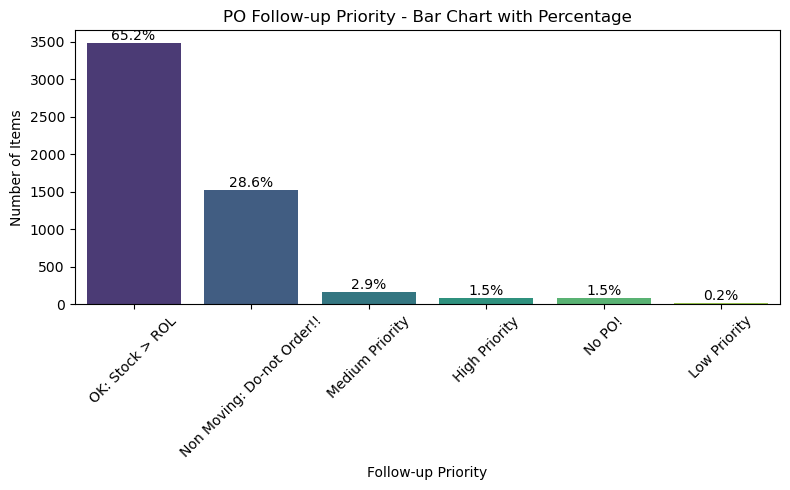

In [857]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the values
priority_counts = final_df['PO_followup_priority'].value_counts().reset_index()
priority_counts.columns = ['Priority', 'Count']

# Calculate total for percentage
total = priority_counts['Count'].sum()
priority_counts['Percentage'] = (priority_counts['Count'] / total * 100).round(1)

# Plot bar chart
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=priority_counts, x='Priority', y='Count', palette='viridis')

# Add percentage labels on top of bars
for i, row in priority_counts.iterrows():
    ax.text(i, row['Count'] + 1, f"{row['Percentage']}%", ha='center', va='bottom', fontsize=10)

# Formatting
plt.title('PO Follow-up Priority - Bar Chart with Percentage')
plt.xlabel('Follow-up Priority')
plt.ylabel('Number of Items')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




In [859]:
final_df.to_excel('third_out_po_followup.xlsx')

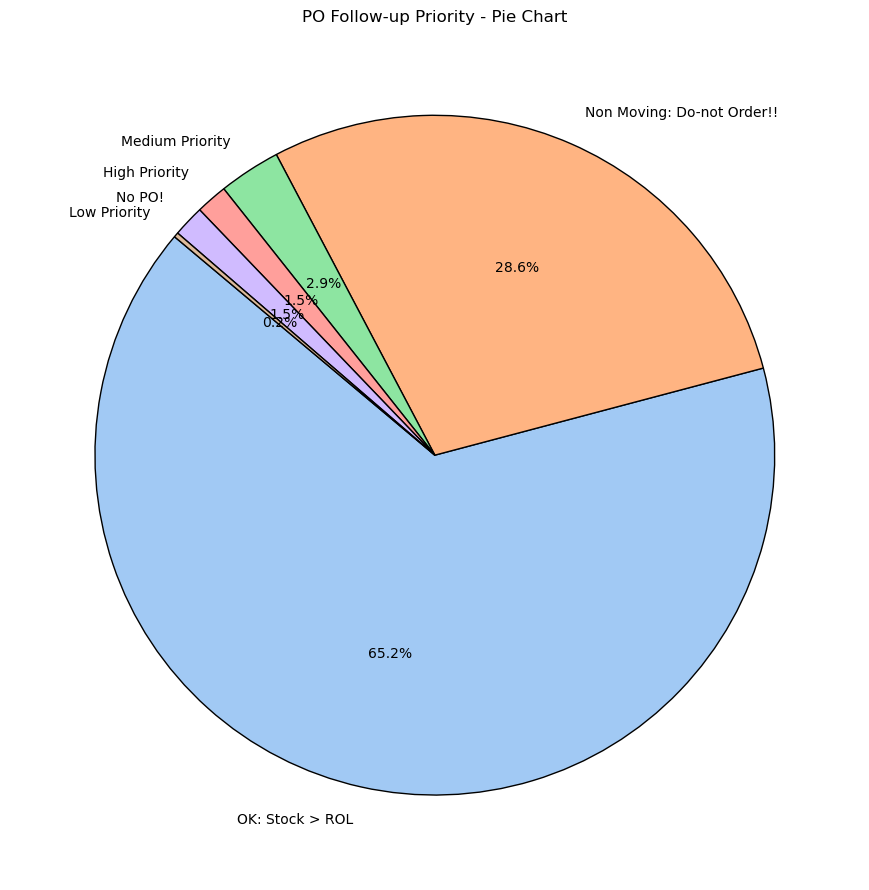

In [863]:
# Pie chart
plt.figure(figsize=(9, 9))
final_df['PO_followup_priority'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('pastel'),
    wedgeprops={'edgecolor': 'black'}
)

plt.title('PO Follow-up Priority - Pie Chart')
plt.ylabel('')  # Hide y-axis label
plt.tight_layout()
plt.show()
